# Machine Learning Engineer Nanodegree
## Project 5: Deep Learning Capstone - Number Recognition for SVHN



In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import tensorflow as tf
import scipy.io as io
import numpy as np
import csv

import os
from datetime import datetime

In [2]:
train_data = io.loadmat("../data/train_32x32.mat")
test_data = io.loadmat("../data/test_32x32.mat")

train_dataset = train_data['X']
train_labels = train_data['y']
test_dataset = test_data['X']
test_labels = test_data['y']

print('Training set', train_dataset.shape, train_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)    

Training set (32, 32, 3, 73257) (73257, 1)
Test set (32, 32, 3, 26032) (26032, 1)


In [3]:
IMAGE_SIZE = 32
NUM_CLASSES = 10
NUM_CHANNELS = 1
NUM_TRAIN_DATA = 73257

def reformat(dataset, labels):
    dataset = np.transpose(dataset, (3, 0, 1, 2)).astype(np.float32)
    one_hot_labels = []
    for label in labels:
        one_hot_label = np.zeros(NUM_CLASSES, np.float32)
        if label[0] == 10:
            one_hot_label[0] = 1.0
        else:
            one_hot_label[label[0]] = 1.0
        one_hot_labels.append(one_hot_label)
    labels = np.array(one_hot_labels).astype(np.float32)
    return dataset, labels

valid_dataset = train_dataset[:, :, :, NUM_TRAIN_DATA : ]
valid_labels = train_labels[NUM_TRAIN_DATA : ]
train_dataset = train_dataset[:, :, :, : NUM_TRAIN_DATA]
train_labels = train_labels[ : NUM_TRAIN_DATA]

train_dataset, train_labels = reformat(train_dataset, train_labels)
valid_dataset, valid_labels = reformat(valid_dataset, valid_labels)
test_dataset, test_labels = reformat(test_dataset, test_labels)

print('Training set', train_dataset.shape, train_labels.shape)
print('Validation set', valid_dataset.shape, valid_labels.shape)
print('Test set', test_dataset.shape, test_labels.shape)

Training set (73257, 32, 32, 3) (73257, 10)
Validation set (0, 32, 32, 3) (0,)
Test set (26032, 32, 32, 3) (26032, 10)


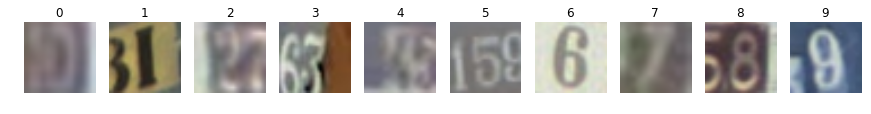

In [7]:
plt.rcParams['figure.figsize'] = (15.0, 15.0)
f, ax = plt.subplots(nrows=1, ncols=10)

picked = np.zeros(10, int)
count = np.zeros(10, int)
cnt = 0
while cnt != 10:
    idx = np.random.randint(0, train_dataset.shape[0] - 1)
    lab = np.argmax(train_labels[idx])
    if count[lab] == 0:
        count[lab] = 1
        picked[lab] = idx
        cnt += 1


for i in range(10):
    ax[i].axis('off')
    ax[i].set_title(np.argmax(train_labels[picked[i]]), loc='center')
    ax[i].imshow(train_dataset[picked[i]])

In [8]:
def normalize(dataset):
    new_dataset = np.add.reduce(dataset, keepdims=True, axis=3)
    new_dataset = new_dataset / 3.0
    return new_dataset / 128 - 1.0

new_train_dataset = normalize(train_dataset)
new_valid_dataset = normalize(valid_dataset)
new_test_dataset = normalize(test_dataset)

print('Training set', new_train_dataset.shape, train_labels.shape)
print('Validation set', new_valid_dataset.shape, valid_labels.shape)
print('Test set', new_test_dataset.shape, test_labels.shape)

Training set (73257, 32, 32, 1) (73257, 10)
Validation set (0, 32, 32, 1) (0,)
Test set (26032, 32, 32, 1) (26032, 10)


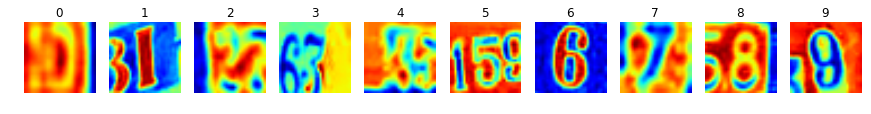

In [9]:
f, ax = plt.subplots(nrows=1, ncols=10)
for i in range(10):
    ax[i].axis('off')
    ax[i].set_title(np.argmax(train_labels[picked[i]]), loc='center')
    ax[i].imshow(new_train_dataset[picked[i]].squeeze())

In [28]:
count = np.zeros(10, int)
for lab in train_labels:
    count[np.argmax(lab)] += 1

for i in range(10):
    print("%d: %d" % (i, count[i]))

count = np.zeros(10, int)
for lab in test_labels:
    count[np.argmax(lab)] += 1

for i in range(10):
    print("%d: %d" % (i, count[i]))

0: 4948
1: 13861
2: 10585
3: 8497
4: 7458
5: 6882
6: 5727
7: 5595
8: 5045
9: 4659
0: 1744
1: 5099
2: 4149
3: 2882
4: 2523
5: 2384
6: 1977
7: 2019
8: 1660
9: 1595
